# Logistic Regression for Customer Churn

## Objective
Implement logistic regression to predict customer churn for a telecom company.

## Steps
1. Load Dataset.
2. Understand Information
3. Data Preprocessing
4. Model Fitting
5. Prediction and Evaluation
6. Plot the ROC Curve
7. Discussion

## Setup Environment

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load Data Set

We begin by loading the customer churn dataset.

In [12]:
csv_file = 'telco_churn_data.csv'

data = pd.read_csv(csv_file)
data.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


## 2. Understand Information


We will perforexploratory data analysisDA to understand the factors influencing customer churn.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

### Check for Missing Data

In [13]:
data.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

### Plot Distributions of Features

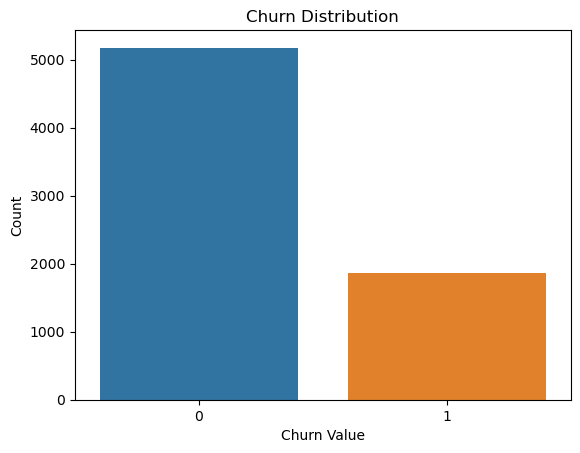

In [22]:
sns.countplot(x = 'Churn Value', data = data)
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.show()

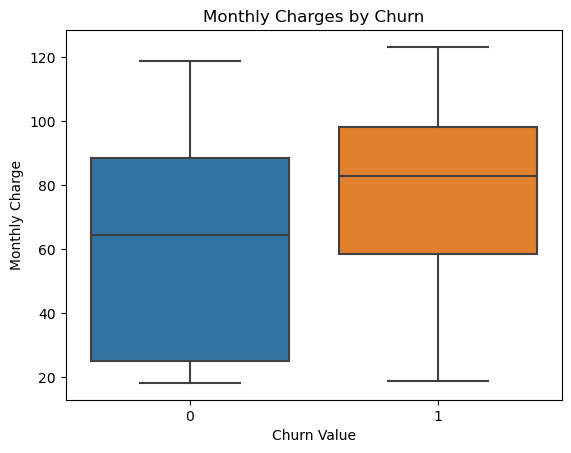

In [21]:
sns.boxplot(x = 'Churn Value', y = 'Monthly Charge', data = data)
plt.title('Monthly Charges by Churn')
plt.show()

## 3. Data Preprocessing

We will handle any missing values, encode categorical variables, and normalize numerical features.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Handle Missing Values for Numerical Columns

In [25]:
num_col = data.select_dtypes(include=['float64', 'int64']).columns

data[num_col] = data[num_col].fillna(data[num_col].mean())

data = pd.get_dummies(data, drop_first = True)
data.columns

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       ...
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Limited range of services',
       'Churn Reason_Long distance charges', 'Churn Reason_Moved',
       'Churn Reason_Network reliability',
       'Churn Reason_Poor expertise of online support',
       'Churn Reason_Poor expertise of phone support',
       'Churn Reason_Price too high', 'Churn Reason_Product dissatisfaction',
       'Churn Reason_Service dissatisfaction'],
      dtype='object', length=8218)

In [26]:
X = data.drop('Churn Value', axis = 1)
y = data['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Model Fitting

We will use logistic regression to fit the model to our training data.

In [28]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, y_train)
reg

LogisticRegression()

## 5. Prediction and Evaluation

We will predict customer churn for the test set and evaluate the model's performance.

In [43]:
from sklearn import metrics

pred = reg.predict(X_test)
acc = metrics.accuracy_score(y_test, pred)

print(f'Accuracy: {acc}')

Accuracy: 0.9673527324343506


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

cm = confusion_matrix(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

print(f'Confusion Matrix:\n{cm}')
print(f'ROC AUC: {roc_auc}')

Confusion Matrix:
[[1008    1]
 [  45  355]]
ROC AUC: 0.9432544598612487


## 6. Plot the ROC Curve

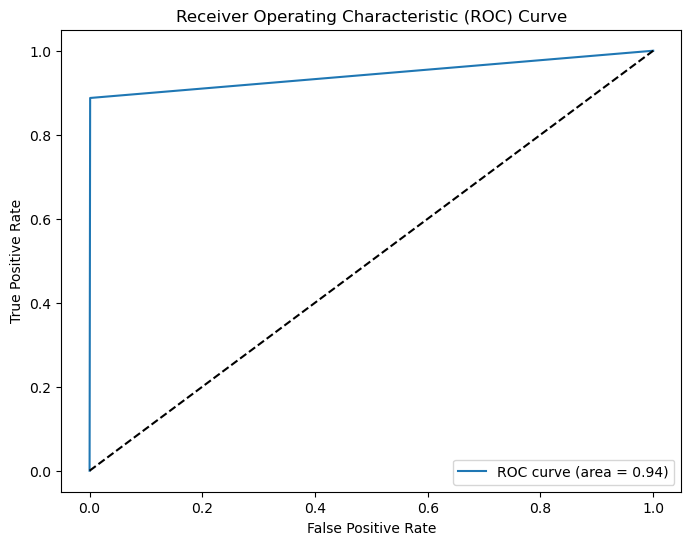

In [40]:
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 7. Discussion

We analyze the model's accuracy and discuss potential improvements and biases.


### Model Accuracy

- The accuracy score shows the proportion of correct predictions.
- The confusion matrix is used to evaluate the performance of a classification model, providing a summary of the prediction results. It compares the actual target values with the values predicted by the model.
- The ROC AUC value indicates the model's ability to distinguish between classes. Values closer to 1 indicate better performance.

### Potential Improvements

- Use more advanced classification techniques.
- Balance the dataset if there is class imbalance.

### Potential Biases

- The dataset may not be representative of all customer demographics.
- The model may overfit or underfit if not properly validated.